# Experiement: First Round | 4%

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("../data/cardio_4.csv")

df.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0  38909  20453       1     170    75.0    120     80            1     1   
1  70332  21250       1     162    74.0    130     70            1     1   
2   6734  22359       2     164    77.0    140     90            1     1   
3  19705  19165       1     163    72.0    140     70            1     1   
4  72468  21624       2     164    60.0    120     80            1     1   

   smoke  alco  active  cardio  
0      0     0       1       1  
1      0     0       1       1  
2      0     0       1       1  
3      0     0       1       1  
4      0     0       1       1

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36279 entries, 0 to 36278
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           36279 non-null  int64  
 1   age          36279 non-null  int64  
 2   gender       36279 non-null  int64  
 3   height       36279 non-null  int64  
 4   weight       36279 non-null  float64
 5   ap_hi        36279 non-null  int64  
 6   ap_lo        36279 non-null  int64  
 7   cholesterol  36279 non-null  int64  
 8   gluc         36279 non-null  int64  
 9   smoke        36279 non-null  int64  
 10  alco         36279 non-null  int64  
 11  active       36279 non-null  int64  
 12  cardio       36279 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 3.6 MB


0    34679
1     1600
Name: cardio, dtype: int64

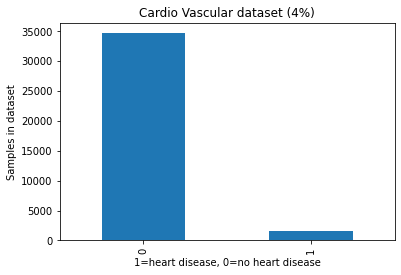

In [3]:
pd.value_counts(df['cardio']).plot.bar()
plt.title('Cardio Vascular dataset (4%)')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Samples in dataset')
df['cardio'].value_counts()

Balance ratio: 34622/69301 = 0,0441026

# Train/Test split

The random_state is 42.

In [4]:
# Importing the splitter, classification model, and the metric
from sklearn.model_selection import train_test_split
#Splitting the data with stratification
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['cardio']), df['cardio'], test_size = 0.2, stratify = df['cardio'], random_state = 42)

In [5]:
X_train.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
5342   11686  19932       1     165    55.0    120     80            1     1   
15125  39395  15278       1     165    60.0    100     60            1     1   
27266  73997  21198       1     168    65.0    120     80            1     1   
31127  85086  18057       1     150    60.0    120     80            1     1   
26776  72647  19655       1     159    71.0    100     70            1     1   

       smoke  alco  active  
5342       0     0       1  
15125      0     0       0  
27266      0     0       1  
31127      0     0       0  
26776      0     0       1

# Logistic Regression with raw dataset

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     27743
           1       0.14      0.00      0.00      1280

    accuracy                           0.96     29023
   macro avg       0.55      0.50      0.49     29023
weighted avg       0.92      0.96      0.93     29023



In [7]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6936
           1       0.00      0.00      0.00       320

    accuracy                           0.96      7256
   macro avg       0.48      0.50      0.49      7256
weighted avg       0.91      0.96      0.93      7256



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.656


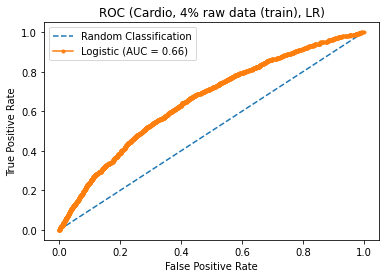

In [8]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 4% raw data (train), LR)')
# show the legend
pyplot.legend()
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.654


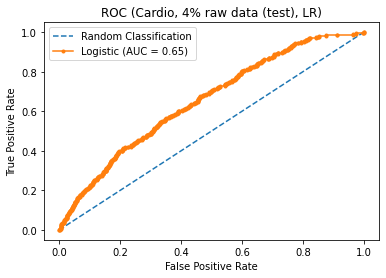

In [9]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 4% raw data (test), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# SVM with raw dataset

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     27743
           1       1.00      0.00      0.00      1280

    accuracy                           0.96     29023
   macro avg       0.98      0.50      0.49     29023
weighted avg       0.96      0.96      0.93     29023



In [11]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6936
           1       0.00      0.00      0.00       320

    accuracy                           0.96      7256
   macro avg       0.48      0.50      0.49      7256
weighted avg       0.91      0.96      0.93      7256



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.781


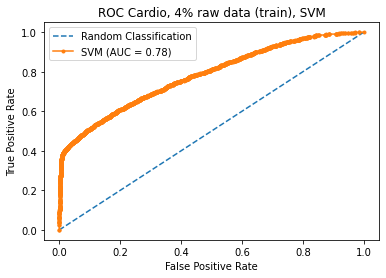

In [12]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 4% raw data (train), SVM')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.576


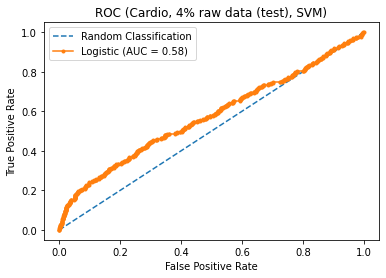

In [13]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 4% raw data (test), SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# XGBoost with raw dataset

In [14]:
import xgboost as xgb
import pickle
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [15]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.04396	validation_0-logloss:0.61306	validation_1-error:0.04410	validation_1-logloss:0.61319
[1]	validation_0-error:0.04400	validation_0-logloss:0.54746	validation_1-error:0.04410	validation_1-logloss:0.54782
[2]	validation_0-error:0.04410	validation_0-logloss:0.49296	validation_1-error:0.04396	validation_1-logloss:0.49339
[3]	validation_0-error:0.04410	validation_0-logloss:0.44711	validation_1-error:0.04410	validation_1-logloss:0.44771
[4]	validation_0-error:0.04407	validation_0-logloss:0.40816	validation_1-error:0.04410	validation_1-logloss:0.40890
[5]	validation_0-error:0.04407	validation_0-logloss:0.37482	validation_1-error:0.04410	validation_1-logloss:0.37558
[6]	validation_0-error:0.04407	validation_0-logloss:0.34609	validation_1-error:0.04410	validation_1-logloss:0.34706
[7]	validation_0-error:0.04407	validation_0-logloss:0.32128	validation_1-error:0.04410	validation_1-logloss:0.32240
[8]	validation_0-error:0.04407	validation_0-logloss:0.29978	validation_1

[71]	validation_0-error:0.04410	validation_0-logloss:0.14445	validation_1-error:0.04410	validation_1-logloss:0.15436
CPU times: user 3.24 s, sys: 107 ms, total: 3.35 s
Wall time: 13.2 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [16]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     27743
           1       0.00      0.00      0.00      1280

    accuracy                           0.96     29023
   macro avg       0.48      0.50      0.49     29023
weighted avg       0.91      0.96      0.93     29023



In [17]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      6936
           1       0.00      0.00      0.00       320

    accuracy                           0.96      7256
   macro avg       0.48      0.50      0.49      7256
weighted avg       0.91      0.96      0.93      7256



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.829


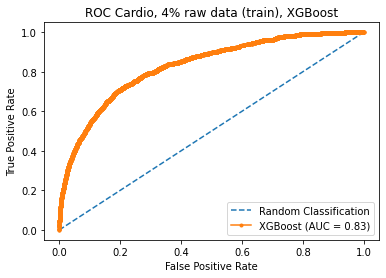

In [18]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 4% raw data (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.798


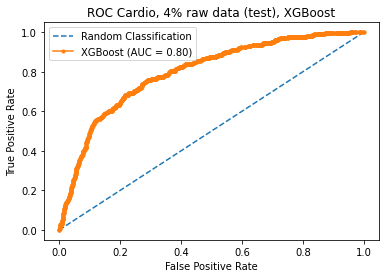

In [19]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 4% raw data (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# Data augmentation

In the following part, the data gets perfectly balanced, by applying SMOTE, TVAE, and CTGAN to the raw dataset. The minority class is oversampled, by only creating samples with cardio=1. Afterwards, the machine learning algorithms run with the balaned datasets.

In [20]:
df_train = X_train
df_train['cardio'] = y_train

In [21]:
df_train.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
5342   11686  19932       1     165    55.0    120     80            1     1   
15125  39395  15278       1     165    60.0    100     60            1     1   
27266  73997  21198       1     168    65.0    120     80            1     1   
31127  85086  18057       1     150    60.0    120     80            1     1   
26776  72647  19655       1     159    71.0    100     70            1     1   

       smoke  alco  active  cardio  
5342       0     0       1       0  
15125      0     0       0       0  
27266      0     0       1       0  
31127      0     0       0       0  
26776      0     0       1       0


### SMOTE

1    27743
0    27743
Name: cardio, dtype: int64

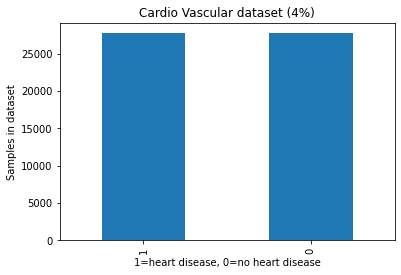

In [22]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE(random_state = 101)
X, y = smote.fit_resample(df_train[['id','age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active']], df_train['cardio'])
#Creating a new Oversampling Data Frame
df_oversampler = pd.DataFrame(X, columns = ['id','age','gender','height','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','alco','active'])
df_oversampler_y = pd.DataFrame(y, columns = ['cardio'])
pd.value_counts(df_oversampler_y['cardio']).plot.bar()
plt.title('Cardio Vascular dataset (4%)')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Samples in dataset')
df_oversampler_y['cardio'].value_counts()

In [23]:
X_train = df_oversampler
y_train = df_oversampler_y

## Logistic Regression with data from SMOTE

In [24]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.71      0.74      0.73     27743
           1       0.73      0.69      0.71     27743

    accuracy                           0.72     55486
   macro avg       0.72      0.72      0.72     55486
weighted avg       0.72      0.72      0.72     55486



In [25]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.73      0.84      6936
           1       0.10      0.67      0.18       320

    accuracy                           0.73      7256
   macro avg       0.54      0.70      0.51      7256
weighted avg       0.94      0.73      0.81      7256



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.784


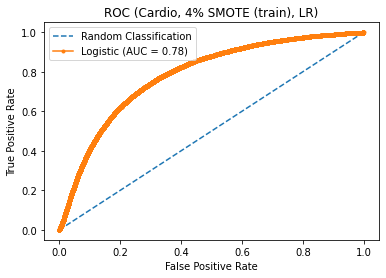

In [26]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 4% SMOTE (train), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.764


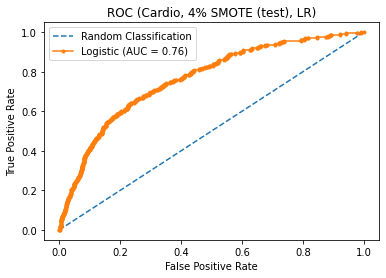

In [27]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 4% SMOTE (test), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## SVM with data from SMOTE

In [28]:
clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79     27743
           1       0.79      0.81      0.80     27743

    accuracy                           0.79     55486
   macro avg       0.79      0.79      0.79     55486
weighted avg       0.79      0.79      0.79     55486



In [29]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.78      0.86      6936
           1       0.09      0.47      0.15       320

    accuracy                           0.76      7256
   macro avg       0.53      0.62      0.50      7256
weighted avg       0.93      0.76      0.83      7256



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.873


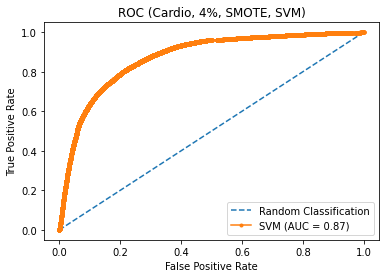

In [30]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 4%, SMOTE, SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.694


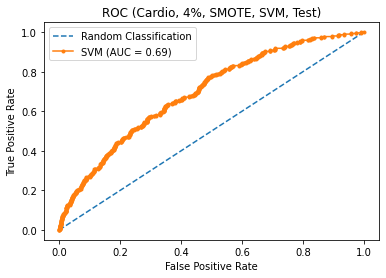

In [31]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 4%, SMOTE, SVM, Test)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## XGBoost with data from SMOTE

In [32]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.18877	validation_0-logloss:0.65061	validation_1-error:0.23167	validation_1-logloss:0.65270
[1]	validation_0-error:0.18455	validation_0-logloss:0.61611	validation_1-error:0.16731	validation_1-logloss:0.61992
[2]	validation_0-error:0.16613	validation_0-logloss:0.58202	validation_1-error:0.17516	validation_1-logloss:0.58747
[3]	validation_0-error:0.16907	validation_0-logloss:0.55856	validation_1-error:0.17930	validation_1-logloss:0.56564
[4]	validation_0-error:0.16588	validation_0-logloss:0.53274	validation_1-error:0.18095	validation_1-logloss:0.54076
[5]	validation_0-error:0.16437	validation_0-logloss:0.51360	validation_1-error:0.17516	validation_1-logloss:0.52330
[6]	validation_0-error:0.16694	validation_0-logloss:0.49463	validation_1-error:0.17434	validation_1-logloss:0.50452
[7]	validation_0-error:0.16916	validation_0-logloss:0.47872	validation_1-error:0.17544	validation_1-logloss:0.48881
[8]	validation_0-error:0.16323	validation_0-logloss:0.46414	validation_1

[71]	validation_0-error:0.10522	validation_0-logloss:0.26902	validation_1-error:0.10929	validation_1-logloss:0.30302
[72]	validation_0-error:0.10480	validation_0-logloss:0.26788	validation_1-error:0.10943	validation_1-logloss:0.30211
[73]	validation_0-error:0.10476	validation_0-logloss:0.26754	validation_1-error:0.10943	validation_1-logloss:0.30207
[74]	validation_0-error:0.10455	validation_0-logloss:0.26682	validation_1-error:0.10943	validation_1-logloss:0.30175
[75]	validation_0-error:0.10415	validation_0-logloss:0.26590	validation_1-error:0.10763	validation_1-logloss:0.30077
[76]	validation_0-error:0.10341	validation_0-logloss:0.26450	validation_1-error:0.10653	validation_1-logloss:0.29943
[77]	validation_0-error:0.10332	validation_0-logloss:0.26408	validation_1-error:0.10667	validation_1-logloss:0.29920
[78]	validation_0-error:0.10325	validation_0-logloss:0.26376	validation_1-error:0.10708	validation_1-logloss:0.29921
[79]	validation_0-error:0.10276	validation_0-logloss:0.26258	val

[141]	validation_0-error:0.07950	validation_0-logloss:0.21547	validation_1-error:0.09110	validation_1-logloss:0.26679
[142]	validation_0-error:0.07885	validation_0-logloss:0.21439	validation_1-error:0.08972	validation_1-logloss:0.26589
[143]	validation_0-error:0.07849	validation_0-logloss:0.21375	validation_1-error:0.08930	validation_1-logloss:0.26529
[144]	validation_0-error:0.07840	validation_0-logloss:0.21357	validation_1-error:0.08930	validation_1-logloss:0.26513
[145]	validation_0-error:0.07789	validation_0-logloss:0.21225	validation_1-error:0.08917	validation_1-logloss:0.26432
[146]	validation_0-error:0.07775	validation_0-logloss:0.21180	validation_1-error:0.08903	validation_1-logloss:0.26404
[147]	validation_0-error:0.07699	validation_0-logloss:0.21071	validation_1-error:0.08862	validation_1-logloss:0.26347
[148]	validation_0-error:0.07623	validation_0-logloss:0.20958	validation_1-error:0.08807	validation_1-logloss:0.26278
[149]	validation_0-error:0.07535	validation_0-logloss:0.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94     27743
           1       0.96      0.92      0.94     27743

    accuracy                           0.94     55486
   macro avg       0.94      0.94      0.94     55486
weighted avg       0.94      0.94      0.94     55486



In [34]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      6936
           1       0.11      0.11      0.11       320

    accuracy                           0.92      7256
   macro avg       0.54      0.53      0.54      7256
weighted avg       0.92      0.92      0.92      7256



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.984


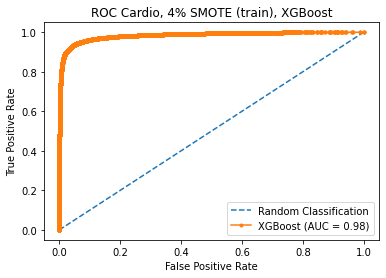

In [35]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 4% SMOTE (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.727


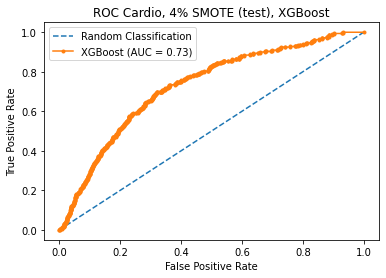

In [36]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 4% SMOTE (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## Data augmentation with TVAE 

In [37]:
df_train['cardio'].value_counts()

0    27743
1     1280
Name: cardio, dtype: int64

In [38]:
from sdv.tabular import TVAE
tvae = TVAE()

tvae.fit(df_train)
# Once trained generate samples
samples = tvae.sample(2000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df = pd.concat([df_train,samples])
tvae_result_df['cardio'].value_counts()

0    27743
1     1280
Name: cardio, dtype: int64

In [39]:
tvae_result_df_1 = tvae_result_df[tvae_result_df['cardio'] == 1]
tvae_result_df_1['cardio'].value_counts()

1    1280
Name: cardio, dtype: int64

In [41]:
tvae_result_df_0 = tvae_result_df[tvae_result_df['cardio'] == 0]
train_df_0_sm = tvae_result_df_0.sample(n = 2500)
train_df_sm = train_df_0_sm.append(tvae_result_df_1)
train_df_sm['cardio'].value_counts()

0    2500
1    1280
Name: cardio, dtype: int64

In [42]:
tvae = TVAE()

tvae.fit(train_df_sm)
samples = tvae.sample(1500)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df = pd.concat([train_df_sm,samples])
tvae_result_df['cardio'].value_counts()

0    2500
1    1312
Name: cardio, dtype: int64

In [43]:
tvae = TVAE()

tvae.fit(tvae_result_df)
samples = tvae.sample(1500)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df_sm1 = pd.concat([tvae_result_df,samples])
tvae_result_df_sm1['cardio'].value_counts()

0    2500
1    1674
Name: cardio, dtype: int64

In [44]:
tvae = TVAE()

tvae.fit(tvae_result_df_sm1)
samples = tvae.sample(1800)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df_sm2 = pd.concat([tvae_result_df_sm1,samples])
tvae_result_df_sm2['cardio'].value_counts()

0    2500
1    2215
Name: cardio, dtype: int64

In [45]:
tvae = TVAE()

tvae.fit(tvae_result_df_sm2)
samples = tvae.sample(2000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df_sm3 = pd.concat([tvae_result_df_sm2,samples])
tvae_result_df_sm3['cardio'].value_counts()

1    2844
0    2500
Name: cardio, dtype: int64

In [46]:
tvae = TVAE()

tvae.fit(tvae_result_df_sm3)
samples = tvae.sample(4000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df_sm4 = pd.concat([tvae_result_df_sm3,samples])
tvae_result_df_sm4['cardio'].value_counts()

1    4386
0    2500
Name: cardio, dtype: int64

In [47]:
tvae_result_df_sm_1 = tvae_result_df_sm4[tvae_result_df_sm4['cardio'] == 1]
train_df_0_med = tvae_result_df_0.sample(n = 6000)
train_df_med = train_df_0_med.append(tvae_result_df_sm_1)
train_df_med['cardio'].value_counts()

0    6000
1    4386
Name: cardio, dtype: int64

In [48]:
tvae = TVAE()

tvae.fit(train_df_med)
samples = tvae.sample(5000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df_med0 = pd.concat([train_df_med,samples])
tvae_result_df_med0['cardio'].value_counts()

1    6176
0    6000
Name: cardio, dtype: int64

In [49]:
tvae = TVAE()

tvae.fit(tvae_result_df_med0)
samples = tvae.sample(7000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df_med1 = pd.concat([tvae_result_df_med0,samples])
tvae_result_df_med1['cardio'].value_counts()

1    6514
0    6000
Name: cardio, dtype: int64

In [50]:
tvae = TVAE()

tvae.fit(tvae_result_df_med1)
samples = tvae.sample(9000)
samples = samples[samples['cardio'] ==1.0]
tvae_result_df_med2 = pd.concat([tvae_result_df_med1,samples])
tvae_result_df_med2['cardio'].value_counts()

1    7745
0    6000
Name: cardio, dtype: int64

In [51]:
tvae_result_df_med = tvae_result_df_med2[tvae_result_df_med2['cardio'] == 1]
train_df_0_med_1 = tvae_result_df_0.sample(n = 10000)
train_df_med_1 = train_df_0_med_1.append(tvae_result_df_med)
train_df_med_1['cardio'].value_counts()

0    10000
1     7745
Name: cardio, dtype: int64

In [52]:
tvae = TVAE()

tvae.fit(train_df_med_1)
samples = tvae.sample(8500)
samples = samples[samples['cardio'] ==1.0]
train_df_med_1_0 = pd.concat([train_df_med_1,samples])
train_df_med_1_0['cardio'].value_counts()

0    10000
1     8293
Name: cardio, dtype: int64

In [53]:
tvae = TVAE()

tvae.fit(train_df_med_1_0)
samples = tvae.sample(9500)
samples = samples[samples['cardio'] ==1.0]
train_df_med_1_1 = pd.concat([train_df_med_1_0,samples])
train_df_med_1_1['cardio'].value_counts()

1    12918
0    10000
Name: cardio, dtype: int64

In [54]:
tvae = TVAE()

tvae.fit(train_df_med_1_1)
samples = tvae.sample(10000)
samples = samples[samples['cardio'] ==1.0]
train_df_med_1_2 = pd.concat([train_df_med_1_1,samples])
train_df_med_1_2['cardio'].value_counts()

1    16944
0    10000
Name: cardio, dtype: int64

In [56]:
tvae_result_df_lg1 = train_df_med_1_2[train_df_med_1_2['cardio'] == 1]
train_df_0_lg = tvae_result_df_0.sample(n = 20000)
train_df_lg = train_df_0_lg.append(tvae_result_df_lg1)
train_df_lg['cardio'].value_counts()

0    20000
1    16944
Name: cardio, dtype: int64

In [57]:
tvae = TVAE()

tvae.fit(train_df_lg)
samples = tvae.sample(18000)
samples = samples[samples['cardio'] ==1.0]
train_df_lg1 = pd.concat([train_df_lg,samples])
train_df_lg1['cardio'].value_counts()

1    23742
0    20000
Name: cardio, dtype: int64

In [58]:
tvae = TVAE()

tvae.fit(train_df_lg1)
samples = tvae.sample(20000)
samples = samples[samples['cardio'] ==1.0]
train_df_lg2 = pd.concat([train_df_lg1,samples])
train_df_lg2['cardio'].value_counts()

1    27213
0    20000
Name: cardio, dtype: int64

In [61]:
tvae.fit(train_df_sm)
samples = tvae.sample(1500)
samples = samples[samples['cardio'] ==1.0]

In [68]:
train_df_lg2 = train_df_lg2.append(samples)
tvae_result_df_0 = df_train[df_train['cardio'] == 0]
tvae_result_df_1 = train_df_lg2[train_df_lg2['cardio'] == 1]

In [69]:
train_df_1_bal = tvae_result_df_1.sample(n = 27743)

In [70]:
train_df_balanced = train_df_1_bal.append(tvae_result_df_0)

1    27743
0    27743
Name: cardio, dtype: int64

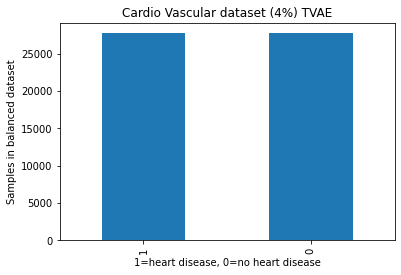

In [71]:
pd.value_counts(train_df_balanced['cardio']).plot.bar()
plt.title('Cardio Vascular dataset (4%) TVAE')
plt.xlabel('1=heart disease, 0=no heart disease')
plt.ylabel('Samples in balanced dataset')
train_df_balanced['cardio'].value_counts()

In [72]:
X_train = train_df_balanced.drop(['cardio'], axis=1)
y_train = train_df_balanced['cardio']

### Logistic Regression with TVAE balanced data

In [73]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.64      0.81      0.72     27743
           1       0.74      0.55      0.63     27743

    accuracy                           0.68     55486
   macro avg       0.69      0.68      0.67     55486
weighted avg       0.69      0.68      0.67     55486



In [74]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.80      0.87      6936
           1       0.06      0.29      0.10       320

    accuracy                           0.78      7256
   macro avg       0.51      0.55      0.49      7256
weighted avg       0.92      0.78      0.84      7256



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.725


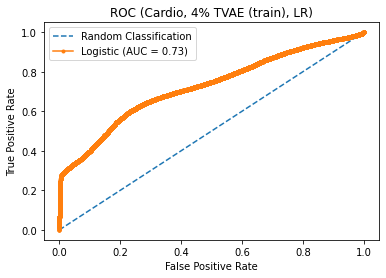

In [75]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 4% TVAE (train), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.594


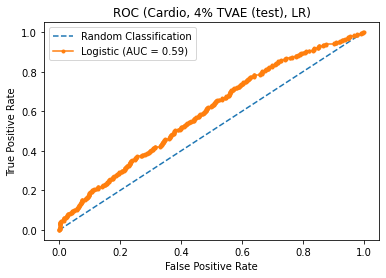

In [76]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 4% TVAE (test), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## SVM with TVAE balanced data

In [77]:
clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     27743
           1       0.99      0.93      0.96     27743

    accuracy                           0.96     55486
   macro avg       0.96      0.96      0.96     55486
weighted avg       0.96      0.96      0.96     55486



In [78]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      6936
           1       0.13      0.02      0.04       320

    accuracy                           0.95      7256
   macro avg       0.54      0.51      0.51      7256
weighted avg       0.92      0.95      0.93      7256



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.980


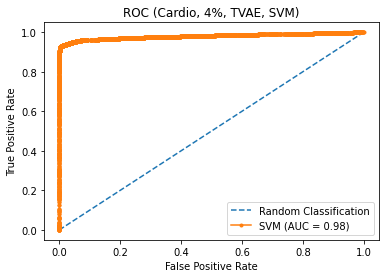

In [79]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 4%, TVAE, SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.634


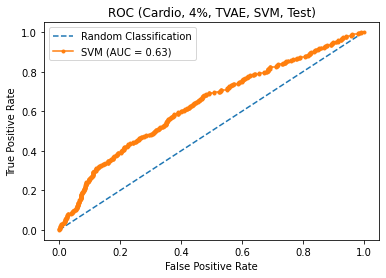

In [80]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 4%, TVAE, SVM, Test)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# XGBoost with TVAE balanced data

In [81]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.05872	validation_0-logloss:0.61655	validation_1-error:0.06946	validation_1-logloss:0.62294
[1]	validation_0-error:0.06110	validation_0-logloss:0.55371	validation_1-error:0.04410	validation_1-logloss:0.56387
[2]	validation_0-error:0.06110	validation_0-logloss:0.50122	validation_1-error:0.04410	validation_1-logloss:0.51507
[3]	validation_0-error:0.06110	validation_0-logloss:0.45715	validation_1-error:0.04410	validation_1-logloss:0.47393
[4]	validation_0-error:0.06110	validation_0-logloss:0.41948	validation_1-error:0.04410	validation_1-logloss:0.43914
[5]	validation_0-error:0.06110	validation_0-logloss:0.38678	validation_1-error:0.04410	validation_1-logloss:0.40781
[6]	validation_0-error:0.05847	validation_0-logloss:0.35882	validation_1-error:0.04741	validation_1-logloss:0.38234
[7]	validation_0-error:0.06110	validation_0-logloss:0.33452	validation_1-error:0.04410	validation_1-logloss:0.35941
[8]	validation_0-error:0.05890	validation_0-logloss:0.31281	validation_1

[71]	validation_0-error:0.03185	validation_0-logloss:0.10450	validation_1-error:0.04824	validation_1-logloss:0.16997
[72]	validation_0-error:0.03186	validation_0-logloss:0.10431	validation_1-error:0.04824	validation_1-logloss:0.17003
[73]	validation_0-error:0.03163	validation_0-logloss:0.10367	validation_1-error:0.04824	validation_1-logloss:0.16988
[74]	validation_0-error:0.03154	validation_0-logloss:0.10337	validation_1-error:0.04824	validation_1-logloss:0.16982
[75]	validation_0-error:0.03127	validation_0-logloss:0.10282	validation_1-error:0.04810	validation_1-logloss:0.16969
[76]	validation_0-error:0.03121	validation_0-logloss:0.10221	validation_1-error:0.04824	validation_1-logloss:0.16948
[77]	validation_0-error:0.03104	validation_0-logloss:0.10140	validation_1-error:0.04851	validation_1-logloss:0.16936
[78]	validation_0-error:0.03102	validation_0-logloss:0.10124	validation_1-error:0.04893	validation_1-logloss:0.16925
[79]	validation_0-error:0.03089	validation_0-logloss:0.10082	val

[141]	validation_0-error:0.02702	validation_0-logloss:0.09021	validation_1-error:0.04920	validation_1-logloss:0.16608
[142]	validation_0-error:0.02702	validation_0-logloss:0.09015	validation_1-error:0.04934	validation_1-logloss:0.16611
[143]	validation_0-error:0.02700	validation_0-logloss:0.09009	validation_1-error:0.04934	validation_1-logloss:0.16605
[144]	validation_0-error:0.02698	validation_0-logloss:0.08996	validation_1-error:0.04934	validation_1-logloss:0.16598
[145]	validation_0-error:0.02694	validation_0-logloss:0.08994	validation_1-error:0.04948	validation_1-logloss:0.16596
[146]	validation_0-error:0.02693	validation_0-logloss:0.08983	validation_1-error:0.04934	validation_1-logloss:0.16588
[147]	validation_0-error:0.02693	validation_0-logloss:0.08967	validation_1-error:0.04906	validation_1-logloss:0.16578
[148]	validation_0-error:0.02689	validation_0-logloss:0.08957	validation_1-error:0.04906	validation_1-logloss:0.16569
[149]	validation_0-error:0.02689	validation_0-logloss:0.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [82]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     27743
           1       1.00      0.95      0.97     27743

    accuracy                           0.97     55486
   macro avg       0.97      0.97      0.97     55486
weighted avg       0.97      0.97      0.97     55486



In [83]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      6936
           1       0.11      0.02      0.03       320

    accuracy                           0.95      7256
   macro avg       0.53      0.50      0.50      7256
weighted avg       0.92      0.95      0.93      7256



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.991


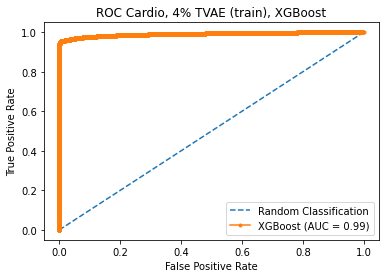

In [84]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 4% TVAE (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.769


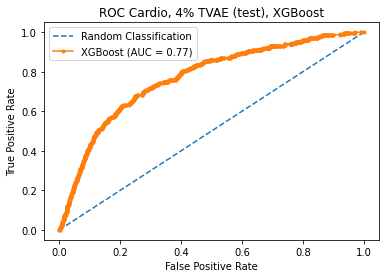

In [85]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 4% TVAE (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## CTGAN for balancing the dataset

In [86]:
ctgan_df_1 = df_train[df_train['cardio'] == 1]
ctgan_df_0 = df_train[df_train['cardio'] == 0]
ctgan_0_sm = ctgan_df_0.sample(n = 3000)
train_df_sm = ctgan_0_sm.append(ctgan_df_1)
train_df_sm['cardio'].value_counts()

0    3000
1    1280
Name: cardio, dtype: int64

In [87]:
from ctgan import CTGANSynthesizer
ctgan = CTGANSynthesizer()

ctgan.fit(train_df_sm, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(500)
samples = samples[samples['cardio'] ==1.0]
samples['cardio'].value_counts()

1    160
Name: cardio, dtype: int64

In [88]:
df_train_sm1 = samples.append(train_df_sm)

In [89]:
ctgan = CTGANSynthesizer()

ctgan.fit(df_train_sm1, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(1000)
samples = samples[samples['cardio'] ==1.0]
df_train_sm2 = df_train_sm1.append(samples)
df_train_sm2['cardio'].value_counts()

0    3000
1    1795
Name: cardio, dtype: int64

In [90]:
ctgan = CTGANSynthesizer()

ctgan.fit(df_train_sm2, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(1200)
samples = samples[samples['cardio'] ==1.0]
df_train_sm3 = df_train_sm2.append(samples)
df_train_sm3['cardio'].value_counts()

0    3000
1    2326
Name: cardio, dtype: int64

In [91]:
ctgan = CTGANSynthesizer()

ctgan.fit(df_train_sm3, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(1800)
samples = samples[samples['cardio'] ==1.0]
df_train_sm4 = df_train_sm3.append(samples)
df_train_sm4['cardio'].value_counts()

1    3152
0    3000
Name: cardio, dtype: int64

In [92]:
ctgan = CTGANSynthesizer()

ctgan.fit(df_train_sm4, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(2500)
samples = samples[samples['cardio'] ==1.0]
df_train_sm5 = df_train_sm4.append(samples)
df_train_sm5['cardio'].value_counts()

1    4498
0    3000
Name: cardio, dtype: int64

In [93]:
ctgan = CTGANSynthesizer()

ctgan.fit(df_train_sm5, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(2700)
samples = samples[samples['cardio'] ==1.0]
df_train_sm6 = df_train_sm5.append(samples)
df_train_sm6['cardio'].value_counts()

1    6270
0    3000
Name: cardio, dtype: int64

In [94]:
ctgan = CTGANSynthesizer()

ctgan.fit(df_train_sm6, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(3000)
samples = samples[samples['cardio'] ==1.0]
df_train_sm7 = df_train_sm6.append(samples)
df_train_sm7['cardio'].value_counts()

1    8073
0    3000
Name: cardio, dtype: int64

In [95]:
ctgan_df_1_med = df_train_sm7[df_train_sm7['cardio'] == 1]
ctgan_0_med = ctgan_df_0.sample(n = 10000)
train_df_med = ctgan_0_med.append(ctgan_df_1_med)
train_df_med['cardio'].value_counts()

0    10000
1     8073
Name: cardio, dtype: int64

In [96]:
ctgan = CTGANSynthesizer()

ctgan.fit(train_df_med, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(8000)
samples = samples[samples['cardio'] ==1.0]
df_train_med1 = train_df_med.append(samples)
df_train_med1['cardio'].value_counts()

1    12585
0    10000
Name: cardio, dtype: int64

In [98]:
ctgan = CTGANSynthesizer()

ctgan.fit(df_train_med1, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(10000)
samples = samples[samples['cardio'] ==1.0]
df_train_med2 = df_train_med1.append(samples)
df_train_med2['cardio'].value_counts()

1    18710
0    10000
Name: cardio, dtype: int64

In [99]:
ctgan = CTGANSynthesizer()

ctgan.fit(df_train_med2, discrete_columns=('gender','cholesterol','gluc','smoke','alco','active','cardio'))
# Once trained generate samples
samples = ctgan.sample(15000)
samples = samples[samples['cardio'] ==1.0]
df_train_med3 = df_train_med2.append(samples)
df_train_med3['cardio'].value_counts()

1    27957
0    10000
Name: cardio, dtype: int64

In [102]:
ctgan_df_1 = df_train_med3[df_train_med3['cardio'] == 1]
train_df_1_bal = ctgan_df_1.sample(n = 27743)
ctgan_df_0 = df_train[df_train['cardio'] == 0]
df_train_bal = train_df_1_bal.append(ctgan_df_0)

In [103]:
df_train_bal['cardio'].value_counts()

1    27743
0    27743
Name: cardio, dtype: int64

In [104]:
X_train = df_train_bal.drop(['cardio'], axis=1)
y_train = df_train_bal['cardio']

### Logistic Regression with CTGAN data

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(classification_report(y_train, classifier.predict(X_train)))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73     27743
           1       0.73      0.71      0.72     27743

    accuracy                           0.72     55486
   macro avg       0.72      0.72      0.72     55486
weighted avg       0.72      0.72      0.72     55486



In [106]:
print(classification_report(y_test, classifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.73      0.83      6936
           1       0.08      0.51      0.14       320

    accuracy                           0.72      7256
   macro avg       0.52      0.62      0.49      7256
weighted avg       0.93      0.72      0.80      7256



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.791


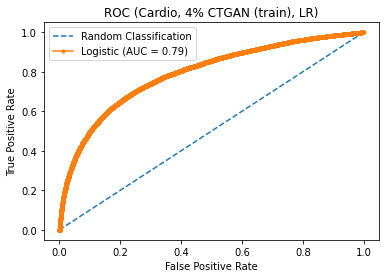

In [107]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = classifier.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 4% CTGAN (train), LR)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.693


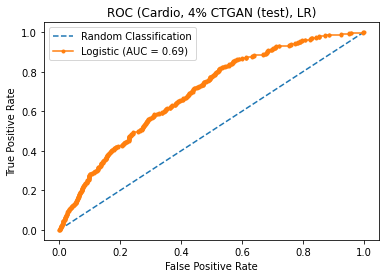

In [108]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 4% CTGAN (test), LR)')
# show the legend
pyplot.legend()
# show the plot

### SVM with CTGAN data

In [109]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(probability=True))
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85     27743
           1       0.86      0.82      0.84     27743

    accuracy                           0.84     55486
   macro avg       0.84      0.84      0.84     55486
weighted avg       0.84      0.84      0.84     55486



In [110]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      6936
           1       0.10      0.33      0.15       320

    accuracy                           0.84      7256
   macro avg       0.53      0.59      0.53      7256
weighted avg       0.93      0.84      0.88      7256



No Skill: ROC AUC=0.500
SVM: ROC AUC=0.912


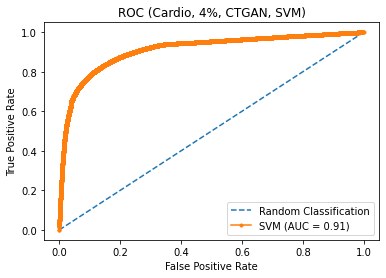

In [111]:
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = clf.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 4%, CTGAN, SVM)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
SVM: ROC AUC=0.694


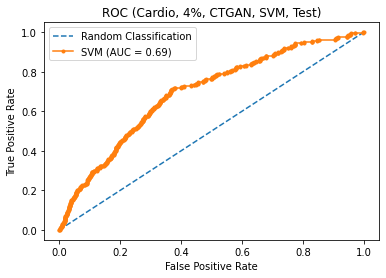

In [112]:
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('SVM: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC (Cardio, 4%, CTGAN, SVM, Test)')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### XGBoost with CTGAN data

In [113]:
import xgboost as xgb
import pickle
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [114]:
%%time

model = xgb.XGBClassifier(max_depth=4,
                        subsample=0.9,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.1)
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train.values.ravel(), early_stopping_rounds=10, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.13484	validation_0-logloss:0.63688	validation_1-error:0.14416	validation_1-logloss:0.63974
[1]	validation_0-error:0.13299	validation_0-logloss:0.59082	validation_1-error:0.14884	validation_1-logloss:0.59570
[2]	validation_0-error:0.12208	validation_0-logloss:0.54408	validation_1-error:0.11329	validation_1-logloss:0.55167
[3]	validation_0-error:0.12255	validation_0-logloss:0.51163	validation_1-error:0.12445	validation_1-logloss:0.52014
[4]	validation_0-error:0.10967	validation_0-logloss:0.47397	validation_1-error:0.11439	validation_1-logloss:0.48550
[5]	validation_0-error:0.10435	validation_0-logloss:0.44397	validation_1-error:0.11411	validation_1-logloss:0.45776
[6]	validation_0-error:0.09666	validation_0-logloss:0.41571	validation_1-error:0.11177	validation_1-logloss:0.43187
[7]	validation_0-error:0.09559	validation_0-logloss:0.39286	validation_1-error:0.11191	validation_1-logloss:0.41080
[8]	validation_0-error:0.09395	validation_0-logloss:0.37278	validation_1

[71]	validation_0-error:0.04947	validation_0-logloss:0.15721	validation_1-error:0.07511	validation_1-logloss:0.21306
[72]	validation_0-error:0.04936	validation_0-logloss:0.15671	validation_1-error:0.07511	validation_1-logloss:0.21282
[73]	validation_0-error:0.04929	validation_0-logloss:0.15593	validation_1-error:0.07566	validation_1-logloss:0.21229
[74]	validation_0-error:0.04915	validation_0-logloss:0.15538	validation_1-error:0.07442	validation_1-logloss:0.21201
[75]	validation_0-error:0.04854	validation_0-logloss:0.15440	validation_1-error:0.07387	validation_1-logloss:0.21142
[76]	validation_0-error:0.04837	validation_0-logloss:0.15397	validation_1-error:0.07387	validation_1-logloss:0.21129
[77]	validation_0-error:0.04821	validation_0-logloss:0.15277	validation_1-error:0.07373	validation_1-logloss:0.21055
[78]	validation_0-error:0.04841	validation_0-logloss:0.15257	validation_1-error:0.07401	validation_1-logloss:0.21046
[79]	validation_0-error:0.04805	validation_0-logloss:0.15191	val

[141]	validation_0-error:0.04304	validation_0-logloss:0.13365	validation_1-error:0.06918	validation_1-logloss:0.20243
[142]	validation_0-error:0.04298	validation_0-logloss:0.13353	validation_1-error:0.06918	validation_1-logloss:0.20242
[143]	validation_0-error:0.04288	validation_0-logloss:0.13337	validation_1-error:0.06905	validation_1-logloss:0.20236
[144]	validation_0-error:0.04289	validation_0-logloss:0.13316	validation_1-error:0.06891	validation_1-logloss:0.20222
[145]	validation_0-error:0.04284	validation_0-logloss:0.13303	validation_1-error:0.06877	validation_1-logloss:0.20223
[146]	validation_0-error:0.04280	validation_0-logloss:0.13290	validation_1-error:0.06877	validation_1-logloss:0.20218
[147]	validation_0-error:0.04277	validation_0-logloss:0.13260	validation_1-error:0.06850	validation_1-logloss:0.20202
[148]	validation_0-error:0.04268	validation_0-logloss:0.13249	validation_1-error:0.06836	validation_1-logloss:0.20194
[149]	validation_0-error:0.04262	validation_0-logloss:0.

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [115]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     27743
           1       0.98      0.94      0.96     27743

    accuracy                           0.96     55486
   macro avg       0.96      0.96      0.96     55486
weighted avg       0.96      0.96      0.96     55486



In [116]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      6936
           1       0.08      0.05      0.06       320

    accuracy                           0.93      7256
   macro avg       0.52      0.51      0.51      7256
weighted avg       0.92      0.93      0.93      7256



No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.987


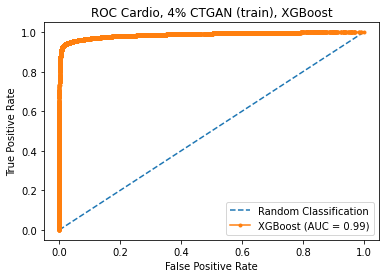

In [117]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_train))]
# predict probabilities
lr_probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_train, ns_probs)
lr_auc = roc_auc_score(y_train, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_train, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 4% CTGAN (train), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
XGBoost: ROC AUC=0.767


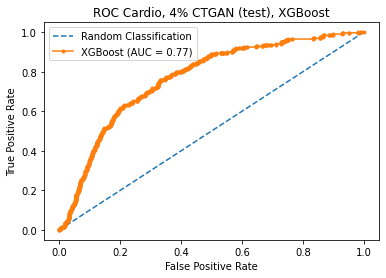

In [118]:
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('XGBoost: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Classification')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='XGBoost (AUC = %0.2f)' % lr_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title('ROC Cardio, 4% CTGAN (test), XGBoost')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()